In [2]:
print("Hello")

Hello


37.60827067669173 6.318045112781955 [ 1  2  3  4  5  6  7  8  9 10 12]


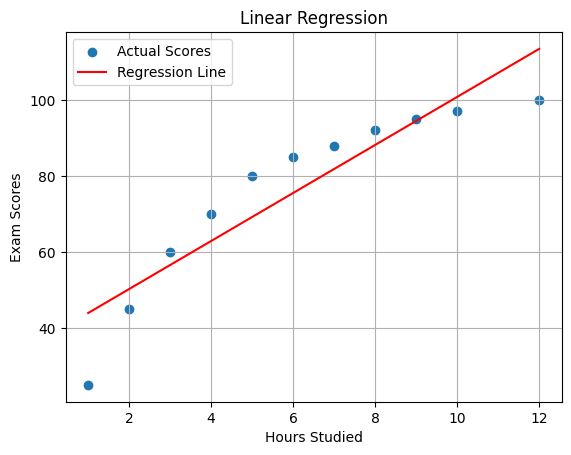

In [12]:
# 1. import the data
# 2. clean the data
# 3. Split the data (Traning Set 80% of data / Test Set 20% of data)
# 4. Create a Model
# 5. Check the output
# 6. Improve

#  We'll create a basic model to predict student scores based on the number of hours they study.


import numpy as np
import matplotlib.pyplot as plt

# Sample data: Number of hours studied and corresponding exam scores
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
exam_scores = np.array([25, 45, 60, 70, 80, 85, 88, 92, 95, 97, 100])

# Calculate the mean of hours studied and exam scores
mean_hours = np.mean(hours_studied)
mean_scores = np.mean(exam_scores)


#### Formula-1 theata1 = sumation(∑) of i=1 to n (xi-x^)(yi-y^)/ sumation(∑) of i=1 to n (xi-x^)^2
# theata1 => represents the slope of the regression line.
# xi and yi => represents are individual data points in your dataset.
# x^ and y^ => the mean (average) of the x-values and y-values, respectively.
# The summation symbol (∑) indicates that you should perform the calculations for each data point and then sum them up.
#### Formula-2 theata0 = y^ - theata1 * x^
# theata0 => represents the y-intercept of the regression line.
#  y^ and x^ => are the means of the x-values and y-values.



# Calculate the slope (theta1) and y-intercept (theta0) of the regression line
numerator = np.sum((hours_studied - mean_hours) * (exam_scores - mean_scores))
denominator = np.sum((hours_studied - mean_hours) ** 2)
theta1 = numerator / denominator
theta0 = mean_scores - theta1 * mean_hours

# Create the regression line
regression_line = theta0 + theta1 * hours_studied

print(theta0,theta1,hours_studied)


# Plot the data points
plt.scatter(hours_studied, exam_scores, label='Actual Scores')

# Plot the regression line
plt.plot(hours_studied, regression_line, color='red', label='Regression Line')

# Customize the plot
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Linear Regression')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [13]:
# Sample data - actual exam scores (y) and predicted scores (y_pred)
actual_scores = [85, 90, 78, 92, 88]
predicted_scores = [82, 88, 75, 95, 89]

# Calculate the error (MSE)
total_squared_error = 0
for i in range(len(actual_scores)):
    squared_error = (actual_scores[i] - predicted_scores[i]) ** 2
    total_squared_error += squared_error

mse = total_squared_error / len(actual_scores)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 6.4


Optimized Parameters (theta): [0.0935274075432884, 1.974094407827312]


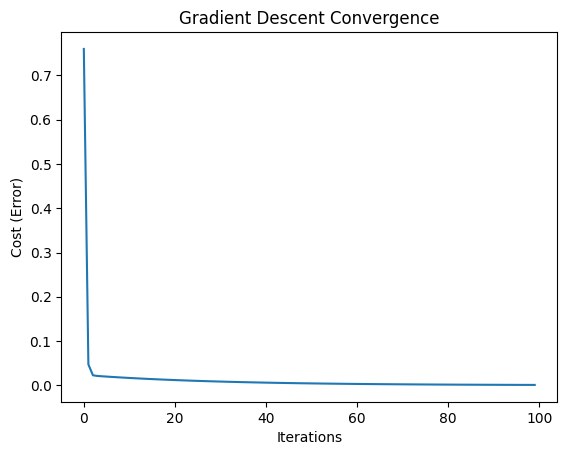

In [14]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)  # Number of data points
    cost_history = []

    for iteration in range(num_iterations):
        # Initialize gradient values
        gradient0 = 0
        gradient1 = 0

        # Calculate the predicted values and error for each data point
        for i in range(m):
            y_pred = theta[0] + theta[1] * X[i]
            error = y_pred - y[i]

            # Update gradient values
            gradient0 += error
            gradient1 += error * X[i]

        # Update the parameters (theta) using the gradients and learning rate
        theta[0] -= (learning_rate * gradient0) / m
        theta[1] -= (learning_rate * gradient1) / m

        # Calculate and record the cost (error) for this iteration
        cost = (1 / (2 * m)) * sum((theta[0] + theta[1] * X[i] - y[i]) ** 2 for i in range(m))
        cost_history.append(cost)

    return theta, cost_history

# Sample data
X = [1, 2, 3, 4, 5]  # Input features
y = [2, 4, 6, 8, 10]  # Target values

# Initial parameters (theta)
theta = [0, 0]

# Hyperparameters
learning_rate = 0.1
num_iterations = 100

# Apply gradient descent to find the best parameters
theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Print the optimized parameters (theta)
print("Optimized Parameters (theta):", theta)

# Plot the cost history to visualize how the error decreased over iterations
import matplotlib.pyplot as plt
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Error)")
plt.title("Gradient Descent Convergence")
plt.show()
